# Imports

In [1]:
import sys
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout,confidence_interval,multiple_runs
from model.utils import SocialPolicy

# Parameters settings

Default parameters. Unless explicitly overriden, these values are used in all scenarios

In [2]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.0,
    mask_efficacy = 0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability =    0.1,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    herding_behavior_mean = 0.7,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20),
    extroversion_mean = 0.5,
    extroversion_stdev = 0.2,
    min_behaviors_to_copy = 1 
)


# Simulation setup

In [3]:
population_size = 1000
simulation_cycles = 180 # days

In [4]:
seed = 314

In [5]:
np.random.seed(seed)
scenario = {}

# Scenarios

## Scenario 1

Do nothing.  In order to print out where every agent is for every step of the day, every 20 days, set debug to True when you make the CovidModel.  You can also set debug to True on multiple runs to print stats out there as well.

In [6]:
sc = 1
params = copy.deepcopy(common_parameters)
set_parameters(params)
#model = CovidModel(debug = True)
model = CovidModel()
seed = 4
np.random.seed(seed)
setup_city_layout(model, population_size)

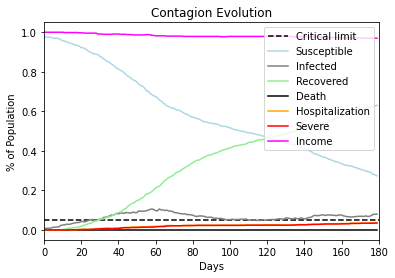

In [7]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

To save time these samples were run with 3 runs, but significant results often require 30 runs, so these numbers should be changed during debugging.

In [8]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[8288, 8979, 1034, 372, 4047, 7043, 3349, 2717, 7193, 2589, 3703, 7338, 1390, 7609, 7481, 9081, 1581, 4828, 738, 5345, 6504, 9292, 6797, 9851, 8886, 5616, 137, 4239, 6215, 2107]
run with seed 8288:
run with seed 8979:
run with seed 1034:
run with seed 372:
run with seed 4047:
run with seed 7043:
run with seed 3349:
run with seed 2717:
run with seed 7193:
run with seed 2589:
run with seed 3703:
run with seed 7338:
run with seed 1390:
run with seed 7609:
run with seed 7481:
run with seed 9081:
run with seed 1581:
run with seed 4828:
run with seed 738:
run with seed 5345:
run with seed 6504:
run with seed 9292:
run with seed 6797:
run with seed 9851:
run with seed 8886:
run with seed 5616:
run with seed 137:
run with seed 4239:
run with seed 6215:
run with seed 2107:
using average of time series:
stats on susceptible:
data: [0.16537777777777776, 0.5622444444444444, 0.906372222222222, 0.20814999999999995, 0.1992222222222222, 0.18589444444444

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 2

Complete lockdown

In [9]:
sc = 2
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]
set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)

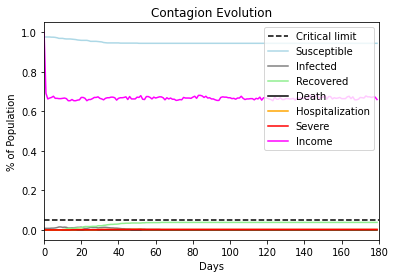

In [10]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [11]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[6482, 8884, 7133]
run with seed 6482:
run with seed 8884:
run with seed 7133:
using average of time series:
stats on susceptible:
data: [0.8970949535192564, 0.7330558330558331, 0.9288055555555556]
min:
0.7330558330558331
max:
0.9288055555555556
std:
0.08578548775394251
mean:
0.8529854473768816
median:
0.8970949535192564
95% confidence interval for the mean:
(0.5919886835982195,1.1139822111555437)
using average of time series:
stats on infected:
data: [0.008781540504648072, 0.03676323676323676, 0.007711111111111112]
min:
0.007711111111111112
max:
0.03676323676323676
std:
0.013450101814985812
mean:
0.01775196279299865
median:
0.008781540504648072
95% confidence interval for the mean:
(-0.023169096678898743,0.05867302226489604)
using average of time series:
stats on recovered:
data: [0.08515936254980078, 0.2191919191919192, 0.05348333333333332]
min:
0.05348333333333332
max:
0.2191919191919192
std:
0.07182341965171521
mean:
0.11927820502501

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 3

Start with complete lockdown then gradually unlock schools on simulation day 30, 60 and 90


In [12]:
sc = 3
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

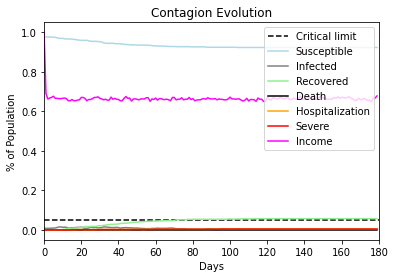

In [13]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [14]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=3,do_print = True)

Save these seeds if you want to rerun a scenario
[5362, 2987, 131]
run with seed 5362:
run with seed 2987:
run with seed 131:
using average of time series:
stats on susceptible:
data: [0.6800944444444443, 0.6258888888888888, 0.5734833333333332]
min:
0.5734833333333332
max:
0.6800944444444443
std:
0.0435258716404119
mean:
0.6264888888888889
median:
0.6258888888888888
95% confidence interval for the mean:
(0.49406425698171796,0.7589135207960598)
using average of time series:
stats on infected:
data: [0.03368333333333333, 0.05042777777777778, 0.05006666666666667]
min:
0.03368333333333333
max:
0.05042777777777778
std:
0.007809683676185937
mean:
0.044725925925925926
median:
0.05006666666666667
95% confidence interval for the mean:
(0.020965471576514138,0.06848638027533771)
using average of time series:
stats on recovered:
data: [0.2762222222222222, 0.3136833333333333, 0.37345]
min:
0.2762222222222222
max:
0.37345
std:
0.04003974422957547
mean:
0.3211185185185185
median:
0.3136833333333333
9

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 4

Like scenario 3 but simulate the start of a public campaing in day 30 to reinforce the importance of social distancing and consequently reduce the overall risk tolerance of the population

In [15]:
sc = 4
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

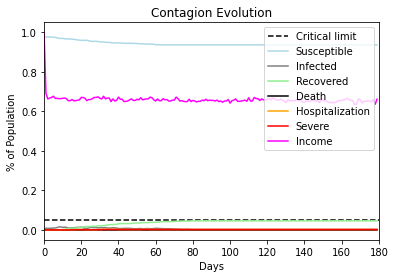

In [16]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [18]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=3,do_print = True)

Save these seeds if you want to rerun a scenario
[5154, 6640, 5708]
run with seed 5154:
run with seed 6640:
run with seed 5708:
using average of time series:
stats on susceptible:
data: [0.2930277777777778, 0.9735833333333329, 0.9574444444444443]
min:
0.2930277777777778
max:
0.9735833333333329
std:
0.3170814537616728
mean:
0.7413518518518517
median:
0.9574444444444443
95% confidence interval for the mean:
(-0.22334783632153365,1.706051540025237)
using average of time series:
stats on infected:
data: [0.08873888888888888, 0.0014055555555555555, 0.0034000000000000007]
min:
0.0014055555555555555
max:
0.08873888888888888
std:
0.04070737699530804
mean:
0.031181481481481477
median:
0.0034000000000000007
95% confidence interval for the mean:
(-0.09266806388879685,0.1550310268517598)
using average of time series:
stats on recovered:
data: [0.6022333333333334, 0.01701111111111111, 0.033155555555555556]
min:
0.01701111111111111
max:
0.6022333333333334
std:
0.2721509404784268
mean:
0.217466666666

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 5

Like scenario 4 but start the campaing in day 1

In [19]:
sc = 5
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

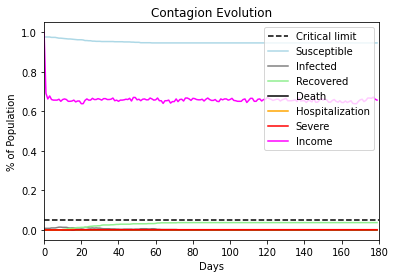

In [20]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [21]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=3,do_print = True)

Save these seeds if you want to rerun a scenario
[7172, 8894, 1666]
run with seed 7172:
run with seed 8894:
run with seed 1666:
using average of time series:
stats on susceptible:
data: [0.8597569097569097, 0.8506049506049507, 0.5436722222222222]
min:
0.5436722222222222
max:
0.8597569097569097
std:
0.14689413716561925
mean:
0.7513446941946942
median:
0.8506049506049507
95% confidence interval for the mean:
(0.3044288413845718,1.1982605470048164)
using average of time series:
stats on infected:
data: [0.012881562881562881, 0.015151515151515154, 0.0609388888888889]
min:
0.012881562881562881
max:
0.0609388888888889
std:
0.02213881172172079
mean:
0.02965732230732231
median:
0.015151515151515154
95% confidence interval for the mean:
(-0.037698571615524645,0.09701321623016926)
using average of time series:
stats on recovered:
data: [0.11936951936951935, 0.12625152625152625, 0.3763888888888889]
min:
0.11936951936951935
max:
0.3763888888888889
std:
0.1195710009966341
mean:
0.20733664483664482


(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 6

Begins with complete lockdown for 30 days, then all sectors are being gradually "unlocked"

In [22]:
sc = 6
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

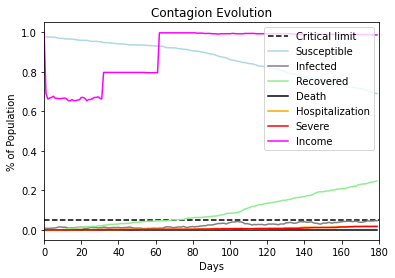

In [23]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [24]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=3,do_print = True)

Save these seeds if you want to rerun a scenario
[9515, 9246, 1618]
run with seed 9515:
run with seed 9246:
run with seed 1618:
using average of time series:
stats on susceptible:
data: [0.9092944444444447, 0.20618021006080708, 0.9489222222222221]
min:
0.20618021006080708
max:
0.9489222222222221
std:
0.34117536774347873
mean:
0.6881322922424914
median:
0.9092944444444447
95% confidence interval for the mean:
(-0.3498715612467088,1.7261361457316915)
using average of time series:
stats on infected:
data: [0.009344444444444447, 0.09955776672194581, 0.0024944444444444445]
min:
0.0024944444444444445
max:
0.09955776672194581
std:
0.04423002317166024
mean:
0.0371322185369449
median:
0.009344444444444447
95% confidence interval for the mean:
(-0.09743474857956522,0.17169918565345502)
using average of time series:
stats on recovered:
data: [0.0743611111111111, 0.6831398562741845, 0.034583333333333334]
min:
0.034583333333333334
max:
0.6831398562741845
std:
0.2968013543725446
mean:
0.264028100239

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 7

Like scenario 6 but in day 1 a campaign to encourage social distancing is started and the overall risk tolerance of people starts decreasing gradually.

In [25]:
sc = 7
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

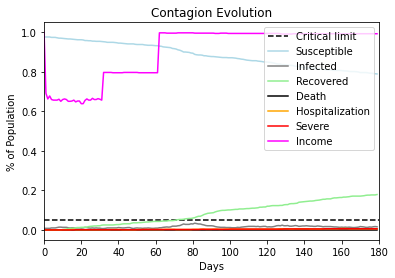

In [26]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [27]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=3,do_print = True)

Save these seeds if you want to rerun a scenario
[1389, 3789, 1660]
run with seed 1389:
run with seed 3789:
run with seed 1660:
using average of time series:
stats on susceptible:
data: [0.42208333333333337, 0.40520000000000006, 0.20157222222222218]
min:
0.20157222222222218
max:
0.42208333333333337
std:
0.10020782235524184
mean:
0.3429518518518519
median:
0.40520000000000006
95% confidence interval for the mean:
(0.03807607361949905,0.6478276300842047)
using average of time series:
stats on infected:
data: [0.06932222222222223, 0.07798333333333332, 0.08812222222222221]
min:
0.06932222222222223
max:
0.08812222222222221
std:
0.007682967551526241
mean:
0.07847592592592592
median:
0.07798333333333332
95% confidence interval for the mean:
(0.05510099713941139,0.10185085471244046)
using average of time series:
stats on recovered:
data: [0.4995944444444444, 0.5088166666666666, 0.6993055555555555]
min:
0.4995944444444444
max:
0.6993055555555555
std:
0.09204805150576643
mean:
0.5692388888888887

(<function dict.items>, <function dict.items>, <function dict.items>)